In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.duplicated().sum()

33

In [9]:
df.drop_duplicates(inplace=True , ignore_index=True)

In [13]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


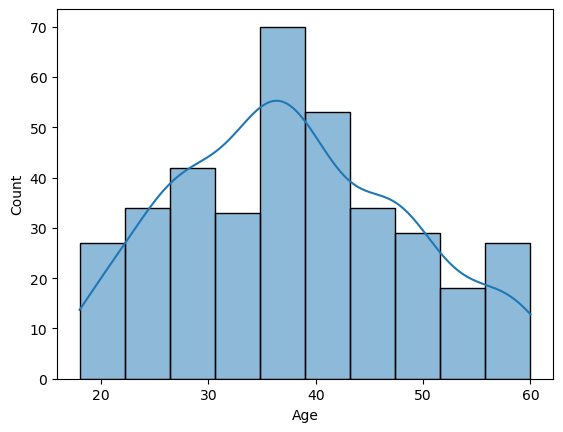

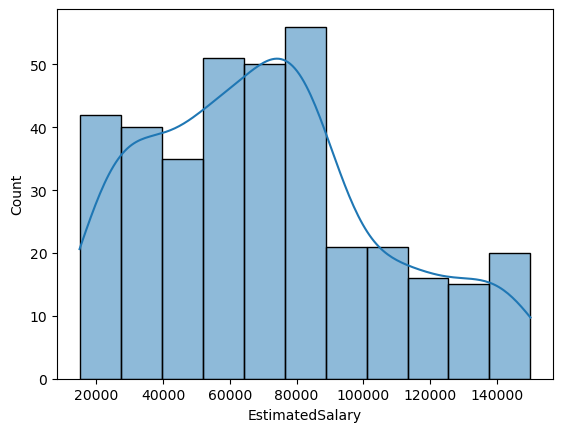

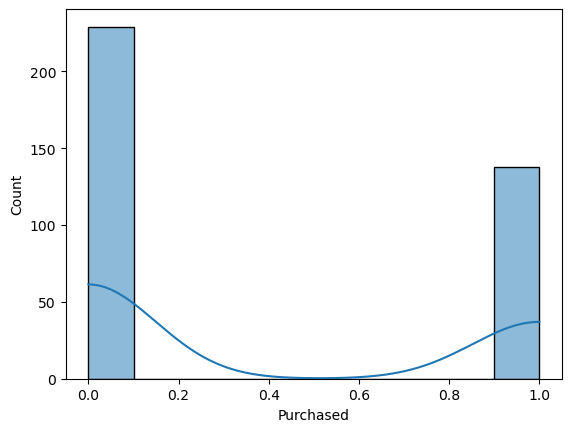

In [19]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.histplot(x = df[col] , kde=True)

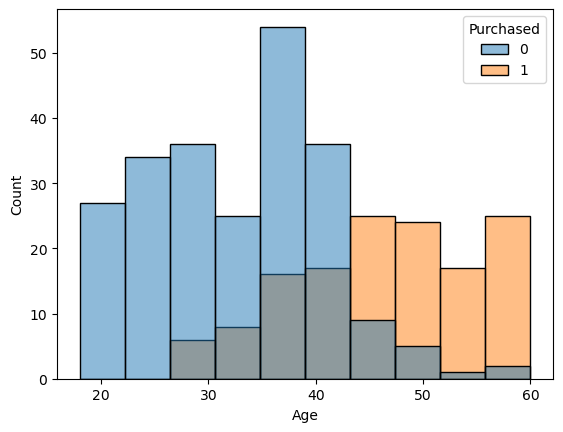

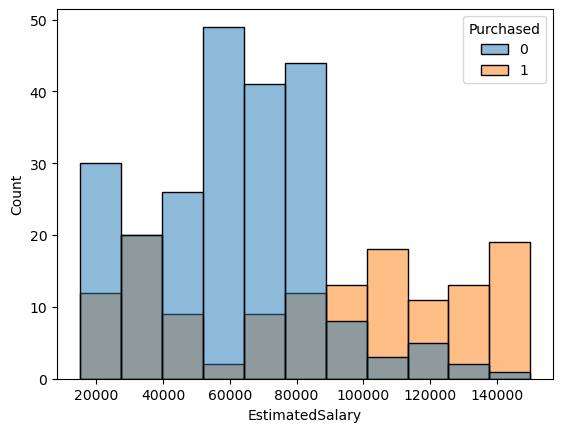

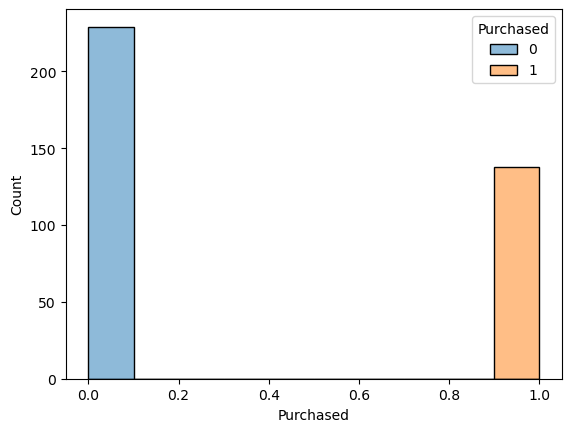

In [21]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.histplot(data=df , x = df[col] , hue='Purchased')

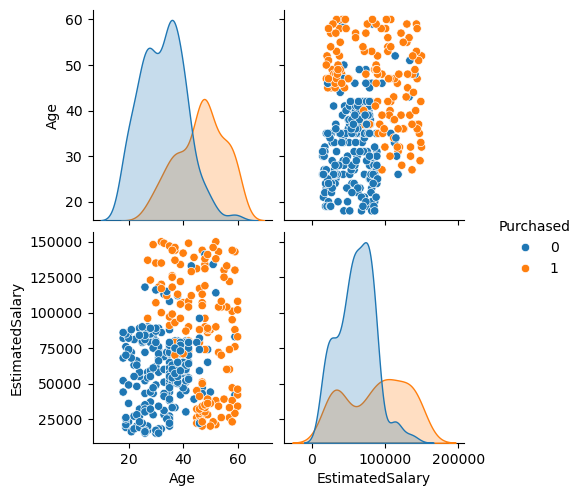

In [23]:
sns.pairplot(df , hue='Purchased')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier , BaggingClassifier ,RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
x , y = df[df.columns[:-1]] , df['Purchased']

In [29]:
x_train , x_test , y_trian , y_test  = train_test_split(x , y ,test_size=0.1 , random_state=0 , stratify=y)

In [31]:
sclr = StandardScaler()

x_train[x_train.columns] = sclr.fit_transform(x_train)
x_test[x_test.columns] = sclr.transform(x_test)

## Voting 

In [50]:
model = VotingClassifier(estimators=[
    ('LG',LogisticRegression()),
    ('SVM' ,SVC()),
    ('KNNC' ,KNeighborsClassifier()),
    ('DT' ,DecisionTreeClassifier()),
    ('GNB',GaussianNB())
] , voting='hard')

In [52]:
model

VotingClassifier(estimators=[('LG', LogisticRegression()), ('SVM', SVC()),
                             ('KNNC', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('GNB', GaussianNB())])

In [54]:
model.fit(x_train , y_trian)

VotingClassifier(estimators=[('LG', LogisticRegression()), ('SVM', SVC()),
                             ('KNNC', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('GNB', GaussianNB())])

In [56]:
model.score(x_train , y_trian)

0.9242424242424242

In [58]:
model.score(x_test , y_test)

0.8108108108108109

In [78]:
model = VotingClassifier(estimators=[
    ('LG',LogisticRegression(C=0.1)),
    ('KNNC' ,KNeighborsClassifier()),
    ('DT' ,DecisionTreeClassifier()),
    ('GNB',GaussianNB())
] , voting='soft')

In [80]:
model

VotingClassifier(estimators=[('LG', LogisticRegression(C=0.1)),
                             ('KNNC', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('GNB', GaussianNB())],
                 voting='soft')

In [82]:
model.fit(x_train , y_trian)

VotingClassifier(estimators=[('LG', LogisticRegression(C=0.1)),
                             ('KNNC', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('GNB', GaussianNB())],
                 voting='soft')

In [84]:
model.score(x_train , y_trian)

0.9606060606060606

In [86]:
model.score(x_test , y_test)

0.8108108108108109

## Bagging

In [103]:
model = BaggingClassifier(estimator=LogisticRegression(C=0.1) , n_estimators=7 , bootstrap=True , bootstrap_features=True)

In [105]:
model

BaggingClassifier(bootstrap_features=True, estimator=LogisticRegression(C=0.1),
                  n_estimators=7)

In [115]:
poly = PolynomialFeatures()

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [117]:
model.fit(x_train_poly , y_trian)

BaggingClassifier(bootstrap_features=True, estimator=LogisticRegression(C=0.1),
                  n_estimators=7)

In [119]:
model.score(x_train_poly , y_trian)

0.8696969696969697

In [121]:
model.score(x_test_poly , y_test)

0.7567567567567568

## Random Forest

In [140]:
model  = RandomForestClassifier(n_estimators=10 , max_depth=5 ,min_samples_split=10 , criterion='entropy')

In [142]:
model

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       n_estimators=10)

In [144]:
model.fit(x_train , y_trian)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       n_estimators=10)

In [146]:
model.score(x_train , y_trian)

0.9363636363636364

In [148]:
model.score(x_test , y_test)

0.7837837837837838